In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
df = pd.read_csv("housing.csv")
df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
df.rename(columns=lambda x: x.strip(), inplace=True)
df["ocean_proximity"] = df["ocean_proximity"].replace("<1H OCEAN", "ONE HOUR FROM OCEAN")
df["total_bedrooms"].fillna(df["total_bedrooms"].median(), inplace=True)


In [ ]:
df = pd.get_dummies(df, columns=["ocean_proximity"], drop_first=True)
print([col for col in df.columns if "ocean_proximity" in col])


['ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN', 'ocean_proximity_ONE HOUR FROM OCEAN']


In [7]:
features = [
    'housing_median_age', 'total_rooms', 'total_bedrooms',
    'population', 'households', 'median_income',
    'ocean_proximity_ISLAND',
    'ocean_proximity_NEAR BAY',
    'ocean_proximity_NEAR OCEAN',
    'ocean_proximity_ONE HOUR FROM OCEAN'
]

X = df[features]
y = df['median_house_value']


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [9]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.4f}")


Mean Squared Error: 5030503277.69
R² Score: 0.6161


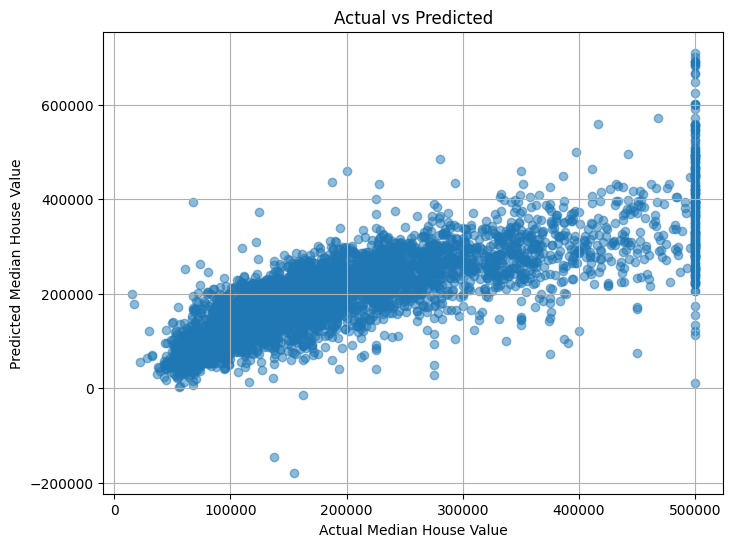

In [10]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.show()


In [11]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results['Error'] = abs(results['Actual'] - results['Predicted'])
worst = results.sort_values(by='Error', ascending=False).head(5)
print(worst)


         Actual      Predicted          Error
6688   500001.0   10010.698871  489990.301129
10574  500001.0  112822.463684  387178.536316
459    500001.0  121958.108972  378042.891028
19542  450000.0   74971.856931  375028.143069
12069  500001.0  134321.133257  365679.866743
